In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from mpmath import nsum
from tqdm import tqdm

In [2]:
from utils.dataset import Dataset
from utils.evaluate import Evalutate

from methods.lecture import lecture_posterior, lecture_prior

In [3]:
dataset = Dataset()
dataset.set_data()
dataset.T

15

In [4]:
evaluate = Evalutate(dataset=dataset, prior=lecture_prior, nparams=3)

In [5]:
evaluate.evaluate(lecture_posterior)

In [6]:
pi_theta1_theta2 = lambda theta1, theta2, t: integrate.quad(lambda theta3: evaluate.posteriors[t](theta1, theta2, theta3), 0, 1)[0]
pi_theta2 = lambda theta2, t: float(nsum(lambda theta1: pi_theta1_theta2(theta1, theta2, t), [evaluate.dataset.cum_nt[t], np.inf]))

In [7]:
P_chongwen_is_true_love = lambda t: pi_theta2(0, t)

In [8]:
t_linspace = np.arange(0, dataset.T+1)
p_is_true_love = []
for t in tqdm(t_linspace): p_is_true_love.append(P_chongwen_is_true_love(t))
p_is_true_love = np.array(p_is_true_love)

100%|██████████| 16/16 [00:00<00:00, 46.34it/s]


Text(0, 0.5, 'P(Chongwen is true love)')

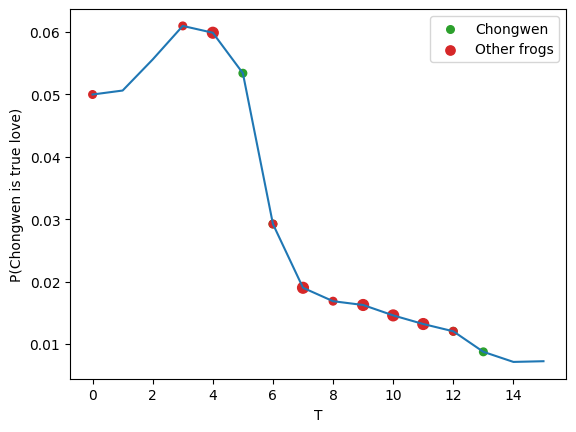

In [22]:
plt.plot(t_linspace, p_is_true_love)
plt.scatter(np.arange(dataset.T)[(dataset.mt>0)[1:]], p_is_true_love[:-1][(dataset.mt>0)[1:]], label="Chongwen", s=dataset.mt[dataset.mt>0]*30, c='tab:green', alpha=1)
plt.scatter(np.arange(dataset.T)[(dataset.nt>0)[1:]], p_is_true_love[:-1][(dataset.nt>0)[1:]], label="Other frogs", s=dataset.nt[dataset.nt>0]*30, c='tab:red', alpha=1)
plt.legend()
plt.xlabel('T')
plt.ylabel('P(Chongwen is true love)')